# Knight's Tour Problem

An interesting puzzler for chess buffs is the Knight’s Tour problem, originally proposed by the
mathematician Euler. Can the knight piece move around an empty chessboard and touch
each of the 64 squares once and only once? 


The knight makes only L-shaped moves (two spaces in one direction and one space
in a perpendicular direction). Thus, as shown in the figure below, from a square near the
middle of an empty chessboard, the knight (labeled K) can make eight different moves
(numbered 0 through 7).

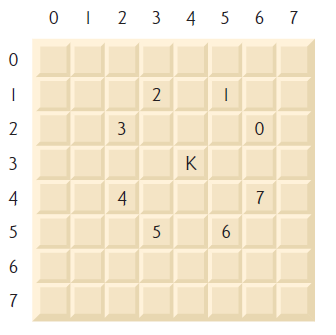

Now let’s develop a script that will move the knight around a chessboard represented
by an eight-by-eight two-dimensional array named board. Initialize
each square to zero. We describe each of the eight possible moves in terms of
its horizontal and vertical components. For example, a move of type 0, as
shown in the preceding figure, consists of moving two squares horizontally to
the right and one square vertically upward. A move of type 2 consists of moving
one square horizontally to the left and two squares vertically upward. Horizontal
moves to the left and vertical moves upward are indicated with negative
numbers. The eight moves may be described by two one-dimensional arrays,
horizontal and vertical, as follows:

In [1]:
import numpy as np
import random 

board = np.zeros((8,8), dtype = np.int8)
current_row = np.random.randint(0,7)
current_col = np.random.randint(0,7)
board[current_row, current_col] = 1


horizontal = [2, 1, -1, -2, -2, -1, 1, 2]
vertical = [-1, -2, -2, -1, 1, 2, 2, 1]



Develop a functhon to print the board

In [2]:
def print_board(board):
    for row in board:
        #print("-"*24)
        for col in row:
            print(f" {col:02d} ",end="")
        print("\n")
            

In [3]:
#print("initial board state")
print_board(board)

 00  00  01  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 



The following function moves the Knight around the board. 

In [4]:
def move(move_number,current_row,current_col):
    new_row = current_row + vertical[move_number]
    new_col = current_col + horizontal[move_number]

    return new_row, new_col


The following function checks whether or not a move is valid:

In [5]:
def validMoves(board,current_row,current_col):
    valid_moves = []
    for move_number in range(8):
        new_row, new_col = move(move_number,current_row,current_col)
        #print(f"new position state:{board[new_row,new_col]}")
        #print(type(board[new_row,new_col]))
        if new_row >= 0 and new_row < 8 and new_col >= 0 and new_col < 8 and board[new_row,new_col] == 0:
            valid_moves.append(move_number)
    return valid_moves


Lets test these functions

In [6]:
print_board(board)
print("Current row and column:", current_row,current_col)
print("Valid moves from this position:", validMoves(board,current_row,current_col))  

 00  00  01  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

Current row and column: 0 2
Valid moves from this position: [4, 5, 6, 7]


In [7]:
for i in range(2,65):
    # find all valid moves from the current position
    valid_moves = validMoves(board, current_row,current_col)
    if valid_moves == []:
        # exit if no valid moves are possible
        print(f"Tour not Complete: No moves possible after {i-1} moves")
        break
    else:
        selected_move = random.choice(valid_moves) # randomly select a move index
        # apply the selected move
        current_row,current_col = move(selected_move, current_row,current_col)
        # write the write the count on the board
        board[current_row,current_col]=i
    if i == 64:
        print(f"Tour Completed")
print("Random Choice:\n")
print_board(board)

Tour not Complete: No moves possible after 37 moves
Random Choice:

 00  22  01  28  00  00  25  00 

 00  33  30  23  02  27  00  00 

 21  00  03  32  29  24  00  26 

 34  31  00  19  04  07  00  00 

 00  20  00  12  00  00  05  00 

 00  35  18  00  06  11  08  15 

 37  00  00  10  13  16  00  00 

 00  00  36  17  00  09  14  00 



## Accessiblity Heuristic

You may have observed that the outer squares are more troublesome than
the squares nearer the center of the board. In fact, the most troublesome or inaccessible
squares are the four corners.

Intuition may suggest that you should attempt to move the knight to the
most troublesome squares first and leave open those that are easiest to get to so
that when the board gets congested near the end of the tour, there will be a
greater chance of success.

We could develop an “accessibility heuristic” by classifying each of the
squares according to how accessible it is and always moving the knight (using the knight’s L-shaped moves) to the most inaccessible square. We fill two dimensional
array accessibility with numbers indicating from how many
squares each particular square is accessible. On a blank chessboard, each of the
16 squares nearest the center is rated as 8, each corner square is rated as 2, and
the other squares have accessibility numbers of 3, 4 or 6 as follows:

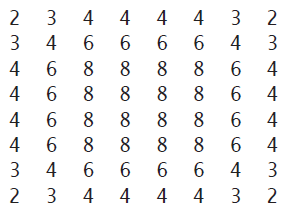

In [8]:
def accessibility(board):
    #calculate accessibility of each cell 
    heuristic = np.zeros((8,8), dtype = np.int8)
    for row in range(0,8):
        for col in range(0,8):
            #print(col)
            heuristic[row,col] = len(validMoves(board, row, col))
    return heuristic

def valid_move_accessibity(accessiblity_boad,valid_moves,current_row,current_col):
    #calculate accessibility after execution of valid moves 
    accessibility = []
    for m in valid_moves:
        new_row, new_col = move(m,current_row,current_col)
        accessibility.append(accessiblity_boad[new_row,new_col])
    return accessibility    


Lets test these functions

In [9]:
print("Current Board:")
print_board(board)
print("\n Accessiblity:")
print_board(accessibility(board))


Current Board:
 00  22  01  28  00  00  25  00 

 00  33  30  23  02  27  00  00 

 21  00  03  32  29  24  00  26 

 34  31  00  19  04  07  00  00 

 00  20  00  12  00  00  05  00 

 00  35  18  00  06  11  08  15 

 37  00  00  10  13  16  00  00 

 00  00  36  17  00  09  14  00 


 Accessiblity:
 01  00  02  00  01  02  00  01 

 00  01  02  03  01  02  02  02 

 01  03  01  03  05  04  04  00 

 01  02  03  02  03  02  02  02 

 03  02  03  01  02  04  01  02 

 03  02  03  04  03  04  03  02 

 00  03  03  03  01  03  03  00 

 01  01  01  01  03  01  00  00 



In [10]:
test_board = np.zeros((8,8), dtype = np.int8)

print("Test Board:")
print_board(test_board)
print("Accessibility of Test Board:" ) 
print_board(accessibility(test_board))

Test Board:
 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

Accessibility of Test Board:
 02  03  04  04  04  04  03  02 

 03  04  06  06  06  06  04  03 

 04  06  08  08  08  08  06  04 

 04  06  08  08  08  08  06  04 

 04  06  08  08  08  08  06  04 

 04  06  08  08  08  08  06  04 

 03  04  06  06  06  06  04  03 

 02  03  04  04  04  04  03  02 



Lets solve the problem by using the accessiblity heuristic

In [13]:
del board # delete the existing bard and initialize a new one 

board = np.zeros((8,8), dtype = np.int8)
current_row = np.random.randint(0,7)
current_col = np.random.randint(0,7)
board[current_row, current_col] = 1

print_board(board)

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  00  00  00  00  00  00 

 00  00  01  00  00  00  00  00 

 00  00  00  00  00  00  00  00 



In [14]:
for i in range(2,65):
    valid_moves = validMoves(board, current_row,current_col)
    if valid_moves == []:
        print(f"Tour Incomplete: No moves possible after {i-1} moves")
        break
    else:
        h = accessibility(board) 
        valid_h = valid_move_accessibity(h,valid_moves,current_row,current_col)
        selected_move = valid_moves[valid_h.index(min(valid_h))] 
        current_row, current_col = move(selected_move, current_row,current_col)
        board[current_row,current_col]=i
    if i == 64:
        print(f"Tour Completed")
        
print("Min Acess:\n")
print_board(board)

Tour Completed
Min Acess:

 39  20  23  06  41  10  25  08 

 22  05  40  37  24  07  44  11 

 19  38  21  58  45  42  09  26 

 04  59  36  55  50  47  12  43 

 35  18  57  46  63  54  27  48 

 60  03  64  51  56  49  30  13 

 17  34  01  62  15  32  53  28 

 02  61  16  33  52  29  14  31 

